# Notes

This notebook combines plotting the number of subhalos traversed by pipes as a function of redshift, and the statistics of impact factor to any traversed subhalos.

It combines the work of /u/cwalker/Illustris_Zhang_Method/Paper_Plots_subhalo_tracing.ipynb and /u/cwalker/Illustris_Zhang_Method/Paper_Plots_Impact_Factor_Analysis.ipynb

It also compares impact factor statistics to the work of Connor & Ravi 2021 (https://ui.adsabs.harvard.edu/abs/2022NatAs...6.1035C), which calculates the impact factors of CHIME FRBs to galaxies and measures the excess DM from them; Connor et al., 2020 (), and Prochaska et al., 2019 (https://ui.adsabs.harvard.edu/abs/2019Sci...366..231P/abstract)

# Imports

In [226]:
import numpy as np
import os
from matplotlib import pyplot as plt
import illustris_python as il
from frb.dm import igm
from astropy import units as u
import scipy.interpolate


# Subhalos traversed bit

## Load subhalo traversed data

In [2]:
#load files
files = os.listdir('./SpeedTempTest/')

#extract subhalo id files
shID_files_99 = [i for i in files if 'snap_99_' in i]
shID_files_99 = [i for i in shID_files_99 if 'true' in i]
shID_files_99.sort()
shID_files_91 = [i for i in files if 'snap_91_' in i]
shID_files_91 = [i for i in shID_files_91 if 'true' in i]
shID_files_91.sort()
shID_files_84 = [i for i in files if 'snap_84_' in i]
shID_files_84 = [i for i in shID_files_84 if 'true' in i]
shID_files_84.sort()
shID_files_78 = [i for i in files if 'snap_78_' in i]
shID_files_78 = [i for i in shID_files_78 if 'true' in i]
shID_files_78.sort()
shID_files_72 = [i for i in files if 'snap_72_' in i]
shID_files_72 = [i for i in shID_files_72 if 'true' in i]
shID_files_72.sort()
shID_files_67 = [i for i in files if 'snap_67_' in i]
shID_files_67 = [i for i in shID_files_67 if 'true' in i]
shID_files_67.sort()
shID_files_59 = [i for i in files if 'snap_59_' in i]
shID_files_59 = [i for i in shID_files_59 if 'true' in i]
shID_files_59.sort()
shID_files_50 = [i for i in files if 'snap_50_' in i]
shID_files_50 = [i for i in shID_files_50 if 'true' in i]
shID_files_50.sort()
shID_files_40 = [i for i in files if 'snap_40_' in i]
shID_files_40 = [i for i in shID_files_40 if 'true' in i]
shID_files_40.sort()
shID_files_33 = [i for i in files if 'snap_33_' in i]
shID_files_33 = [i for i in shID_files_33 if 'true' in i]
shID_files_33.sort()
shID_files_25 = [i for i in files if 'snap_25_' in i]
shID_files_25 = [i for i in shID_files_25 if 'true' in i]
shID_files_25.sort()
shID_files_21 = [i for i in files if 'snap_21_' in i]
shID_files_21 = [i for i in shID_files_21 if 'true' in i]
shID_files_21.sort()
shID_files_17 = [i for i in files if 'snap_17_' in i]
shID_files_17 = [i for i in shID_files_17 if 'true' in i]
shID_files_17.sort()

print(shID_files_99)
print(len(shID_files_99))
print(shID_files_99[0])

['sim_TNG300-1_snap_99_pipe_0_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1000_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1001_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1002_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1003_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1004_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1005_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1006_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1007_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1008_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1009_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_100_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1010_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1011_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1012_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1013_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1014_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1015_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1016_true_shID_list.np

In [3]:
#load the number of unique subhalos (not -1) traversered by each pipe for statistics

unique_sh_IDs_99 = []
for i in shID_files_99:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_99.append(unique_sh_ID_count)
unique_sh_IDs_99 = np.array(unique_sh_IDs_99)
print(unique_sh_IDs_99)

[2 1 2 ... 1 1 0]


In [24]:
unique_sh_IDs_91 = []
for i in shID_files_91:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_91.append(unique_sh_ID_count)
unique_sh_IDs_91 = np.array(unique_sh_IDs_91)
print(unique_sh_IDs_91)

[1 0 0 ... 1 1 3]


In [25]:
unique_sh_IDs_84 = []
for i in shID_files_84:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_84.append(unique_sh_ID_count)
unique_sh_IDs_84 = np.array(unique_sh_IDs_84)
print('84',unique_sh_IDs_84)

unique_sh_IDs_78 = []
for i in shID_files_78:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_78.append(unique_sh_ID_count)
unique_sh_IDs_78 = np.array(unique_sh_IDs_78)
print('78',unique_sh_IDs_78)

unique_sh_IDs_72 = []
for i in shID_files_72:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_72.append(unique_sh_ID_count)
unique_sh_IDs_72 = np.array(unique_sh_IDs_72)
print('72',unique_sh_IDs_72)

unique_sh_IDs_67 = []
for i in shID_files_67:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_67.append(unique_sh_ID_count)
unique_sh_IDs_67 = np.array(unique_sh_IDs_67)
print('67',unique_sh_IDs_67)

unique_sh_IDs_59 = []
for i in shID_files_59:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_59.append(unique_sh_ID_count)
unique_sh_IDs_59 = np.array(unique_sh_IDs_59)
print('59',unique_sh_IDs_59)

unique_sh_IDs_50 = []
for i in shID_files_50:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_50.append(unique_sh_ID_count)
unique_sh_IDs_50 = np.array(unique_sh_IDs_50)
print('50',unique_sh_IDs_50)

84 [2 2 0 ... 0 0 0]
78 [0 2 0 ... 0 2 1]
72 [4 2 0 ... 1 2 2]
67 [1 0 5 ... 1 5 3]
59 [5 5 3 ... 0 1 5]
50 [1 1 1 ... 2 6 6]


In [26]:
unique_sh_IDs_40 = []
for i in shID_files_40:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_40.append(unique_sh_ID_count)
unique_sh_IDs_40 = np.array(unique_sh_IDs_40)
print('40',unique_sh_IDs_40)

unique_sh_IDs_33 = []
for i in shID_files_33:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_33.append(unique_sh_ID_count)
unique_sh_IDs_33 = np.array(unique_sh_IDs_33)
print('33',unique_sh_IDs_33)

unique_sh_IDs_25 = []
for i in shID_files_25:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_25.append(unique_sh_ID_count)
unique_sh_IDs_25 = np.array(unique_sh_IDs_25)
print('25',unique_sh_IDs_25)

unique_sh_IDs_21 = []
for i in shID_files_21:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_21.append(unique_sh_ID_count)
unique_sh_IDs_21 = np.array(unique_sh_IDs_21)
print('21',unique_sh_IDs_21)

unique_sh_IDs_17 = []
for i in shID_files_17:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_17.append(unique_sh_ID_count)
unique_sh_IDs_17 = np.array(unique_sh_IDs_17)
print('17',unique_sh_IDs_17)

40 [2 2 1 ... 1 0 2]
33 [3 3 5 ... 2 2 6]
25 [1 4 1 ... 1 4 0]
21 [2 2 5 ... 5 4 4]
17 [2 2 7 ... 0 1 6]


## Calculate number of subhalos traversed for each snapshot (in a loop)

In [ ]:
## using https://www.tng-project.org/data/forum/topic/235/how-to-identify-subhalos-containing-well-formed-ga/
#determine which of these subhalos are galaxies
# minimal definition: stellar mass is nonzero SubhaloMassType[4]>0
# more stringent definition is subhalo is well resolved. The example used is (SubhaloLenType[4]>100)

sim_to_load = 'TNG300-1' #which simulation to use
basePath = '/virgotng/universe/IllustrisTNG/{0}/output/'.format(sim_to_load)

snap_numbers = [99,91,84,78,72,67,59,50,40,33,25,21,17] #list of snapshots to process
sh_id_files = [shID_files_99,
               shID_files_91,
               shID_files_84,
               shID_files_78,
               shID_files_72,
               shID_files_67,
               shID_files_59,
               shID_files_50,
               shID_files_40,
               shID_files_33,
               shID_files_25,
               shID_files_21,
               shID_files_17] #list of their subhalo ID files

unique_gals_all_99 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_99 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_91 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_91 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_84 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_84 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_78 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_78 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_72 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_72 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_67 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_67 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_59 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_59 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_50 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_50 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_40 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_40 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_33 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_33 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_25 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_25 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_21 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_21 = [] #initialise array to hold well-resolved galaxies traversed
unique_gals_all_17 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_17 = [] #initialise array to hold well-resolved galaxies traversed

unique_gals_all = [unique_gals_all_99,
                   unique_gals_all_91,
                   unique_gals_all_84,
                   unique_gals_all_78,
                   unique_gals_all_72,
                   unique_gals_all_67,
                   unique_gals_all_59,
                   unique_gals_all_50,
                   unique_gals_all_40,
                   unique_gals_all_33,
                   unique_gals_all_25,
                   unique_gals_all_21,
                   unique_gals_all_17] #list containing all snap unique galaxies

unique_gals_wr = [unique_gals_wr_99,
                  unique_gals_wr_91,
                  unique_gals_wr_84,
                  unique_gals_wr_78,
                  unique_gals_wr_72,
                  unique_gals_wr_67,
                  unique_gals_wr_59,
                  unique_gals_wr_50,
                  unique_gals_wr_40,
                  unique_gals_wr_33,
                  unique_gals_wr_25,
                  unique_gals_wr_21,
                  unique_gals_wr_17] #list containing all snap well-resolved galaxies

#loop over snapshots
for i in range(len(snap_numbers)):
    
    snap_number = snap_numbers[i] #get the current snapshot number
    print('Processing snapshot {0}'.format(snap_number))

    snapshot_shID_files = sh_id_files[i] #get the subhalo ID files for this snapshot
    snapshot_unique_gals_all = unique_gals_all[i] #get the list to store unique gals for this snapshot
    snapshot_unique_gals_wr = unique_gals_wr[i] #get the list to store well-resolved gals for this snapshot

    

    #loop over 5125 files in the snapshot
    for j in range(len(snapshot_shID_files)): #for each file...

        shID_file = snapshot_shID_files[j] #get file name
        shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
        shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
        shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1

        ################################################################
        #loop over these subhalo IDs and determine if they are galaxies#
        ################################################################

        galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
        galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)

        for k in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...

            shID = shID_list_uni_nonNeg1[k] #get the subhalo ID
            #print(shID)
            subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
            stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo

            if stellar_mass > 0: #if subhalo contains stellar mass...
                galaxies_all.append(shID) #add to galaxy array

            if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
                galaxies_wr.append(shID) #add to well-resolved galaxies array


        #get number(s) of (well-resolved) galaxies traversed for this file
        unique_gals_all_count  = len(galaxies_all)
        unique_gals_wr_count  = len(galaxies_wr)

        #append number(s) to arrays
        snapshot_unique_gals_all.append(unique_gals_all_count)
        snapshot_unique_gals_wr.append(unique_gals_wr_count)

    #convert to numpy arrays
    snapshot_unique_gals_all = np.array(snapshot_unique_gals_all)
    snapshot_unique_gals_wr = np.array(snapshot_unique_gals_wr)
    
    #update lists containing data for all snapshots
    unique_gals_all[i] = snapshot_unique_gals_all
    unique_gals_wr[i] = snapshot_unique_gals_wr

    print('all galaxies (snap {0}): {1}, well-resolved galaxies: {2}'.format(snap_number,snapshot_unique_gals_all,snapshot_unique_gals_wr))
    print(np.where(snapshot_unique_gals_all>1))    
    
    
        
    

Processing snapshot 99
all galaxies (snap 99): [2 1 2 ... 1 1 0], well-resolved galaxies: [1 1 2 ... 0 0 0]
(array([   0,    2,    3, ..., 5113, 5114, 5121]),)
Processing snapshot 91
all galaxies (snap 91): [0 0 0 ... 0 1 3], well-resolved galaxies: [0 0 0 ... 0 0 2]
(array([   5,   18,   19, ..., 5118, 5119, 5124]),)
Processing snapshot 84
all galaxies (snap 84): [2 0 0 ... 0 0 0], well-resolved galaxies: [1 0 0 ... 0 0 0]
(array([   0,    8,    9, ..., 5109, 5119, 5120]),)
Processing snapshot 78
all galaxies (snap 78): [0 0 0 ... 0 2 1], well-resolved galaxies: [0 0 0 ... 0 0 1]
(array([   6,   10,   16, ..., 5120, 5121, 5123]),)
Processing snapshot 72
all galaxies (snap 72): [3 1 0 ... 1 0 2], well-resolved galaxies: [1 1 0 ... 0 0 1]
(array([   0,    7,   13, ..., 5120, 5121, 5124]),)
Processing snapshot 67
all galaxies (snap 67): [1 0 4 ... 1 3 3], well-resolved galaxies: [0 0 1 ... 0 1 0]
(array([   2,    5,    9, ..., 5121, 5123, 5124]),)
Processing snapshot 59
all galaxies (sna

## Calculate statistics of the subhalos traversed

In [33]:
print(len(unique_sh_IDs_99))
print(len(unique_gals_all_99))
print(len(unique_gals_wr_99))

########################
#mean numbers traversed#
########################

snap_99_mean_shIDs = np.mean(unique_sh_IDs_99) #unique subhalo IDs (non- -1)
snap_99_mean_gals_all = np.mean(unique_gals_all_99) #of which are galaxies
snap_99_mean_gals_wr = np.mean(unique_gals_wr_99) #of which are well-resolved galaxies

snap_91_mean_shIDs = np.mean(unique_sh_IDs_91) #unique subhalo IDs (non- -1)
snap_91_mean_gals_all = np.mean(unique_gals_all_91) #of which are galaxies
snap_91_mean_gals_wr = np.mean(unique_gals_wr_91) #of which are well-resolved galaxies

snap_84_mean_shIDs = np.mean(unique_sh_IDs_84) #unique subhalo IDs (non- -1)
snap_84_mean_gals_all = np.mean(unique_gals_all_84) #of which are galaxies
snap_84_mean_gals_wr = np.mean(unique_gals_wr_84) #of which are well-resolved galaxies

snap_78_mean_shIDs = np.mean(unique_sh_IDs_78) #unique subhalo IDs (non- -1)
snap_78_mean_gals_all = np.mean(unique_gals_all_78) #of which are galaxies
snap_78_mean_gals_wr = np.mean(unique_gals_wr_78) #of which are well-resolved galaxies

snap_72_mean_shIDs = np.mean(unique_sh_IDs_72) #unique subhalo IDs (non- -1)
snap_72_mean_gals_all = np.mean(unique_gals_all_72) #of which are galaxies
snap_72_mean_gals_wr = np.mean(unique_gals_wr_72) #of which are well-resolved galaxies

snap_67_mean_shIDs = np.mean(unique_sh_IDs_67) #unique subhalo IDs (non- -1)
snap_67_mean_gals_all = np.mean(unique_gals_all_67) #of which are galaxies
snap_67_mean_gals_wr = np.mean(unique_gals_wr_67) #of which are well-resolved galaxies

snap_59_mean_shIDs = np.mean(unique_sh_IDs_59) #unique subhalo IDs (non- -1)
snap_59_mean_gals_all = np.mean(unique_gals_all_59) #of which are galaxies
snap_59_mean_gals_wr = np.mean(unique_gals_wr_59) #of which are well-resolved galaxies

snap_50_mean_shIDs = np.mean(unique_sh_IDs_50) #unique subhalo IDs (non- -1)
snap_50_mean_gals_all = np.mean(unique_gals_all_50) #of which are galaxies
snap_50_mean_gals_wr = np.mean(unique_gals_wr_50) #of which are well-resolved galaxies

snap_40_mean_shIDs = np.mean(unique_sh_IDs_40) #unique subhalo IDs (non- -1)
snap_40_mean_gals_all = np.mean(unique_gals_all_40) #of which are galaxies
snap_40_mean_gals_wr = np.mean(unique_gals_wr_40) #of which are well-resolved galaxies

snap_33_mean_shIDs = np.mean(unique_sh_IDs_33) #unique subhalo IDs (non- -1)
snap_33_mean_gals_all = np.mean(unique_gals_all_33) #of which are galaxies
snap_33_mean_gals_wr = np.mean(unique_gals_wr_33) #of which are well-resolved galaxies

snap_25_mean_shIDs = np.mean(unique_sh_IDs_25) #unique subhalo IDs (non- -1)
snap_25_mean_gals_all = np.mean(unique_gals_all_25) #of which are galaxies
snap_25_mean_gals_wr = np.mean(unique_gals_wr_25) #of which are well-resolved galaxies

snap_21_mean_shIDs = np.mean(unique_sh_IDs_21) #unique subhalo IDs (non- -1)
snap_21_mean_gals_all = np.mean(unique_gals_all_21) #of which are galaxies
snap_21_mean_gals_wr = np.mean(unique_gals_wr_21) #of which are well-resolved galaxies

snap_17_mean_shIDs = np.mean(unique_sh_IDs_17) #unique subhalo IDs (non- -1)
snap_17_mean_gals_all = np.mean(unique_gals_all_17) #of which are galaxies
snap_17_mean_gals_wr = np.mean(unique_gals_wr_17) #of which are well-resolved galaxies

print(snap_99_mean_shIDs,snap_99_mean_gals_all,snap_99_mean_gals_wr)

##########################
#median numbers traversed#
##########################

snap_99_median_shIDs = np.median(unique_sh_IDs_99) #unique subhalo IDs (non- -1)
snap_99_median_gals_all = np.median(unique_gals_all_99) #of which are galaxies
snap_99_median_gals_wr = np.median(unique_gals_wr_99) #of which are well-resolved galaxies

snap_91_median_shIDs = np.median(unique_sh_IDs_91) #unique subhalo IDs (non- -1)
snap_91_median_gals_all = np.median(unique_gals_all_91) #of which are galaxies
snap_91_median_gals_wr = np.median(unique_gals_wr_91) #of which are well-resolved galaxies

snap_84_median_shIDs = np.median(unique_sh_IDs_84) #unique subhalo IDs (non- -1)
snap_84_median_gals_all = np.median(unique_gals_all_84) #of which are galaxies
snap_84_median_gals_wr = np.median(unique_gals_wr_84) #of which are well-resolved galaxies

snap_78_median_shIDs = np.median(unique_sh_IDs_78) #unique subhalo IDs (non- -1)
snap_78_median_gals_all = np.median(unique_gals_all_78) #of which are galaxies
snap_78_median_gals_wr = np.median(unique_gals_wr_78) #of which are well-resolved galaxies

snap_72_median_shIDs = np.median(unique_sh_IDs_72) #unique subhalo IDs (non- -1)
snap_72_median_gals_all = np.median(unique_gals_all_72) #of which are galaxies
snap_72_median_gals_wr = np.median(unique_gals_wr_72) #of which are well-resolved galaxies

snap_67_median_shIDs = np.median(unique_sh_IDs_67) #unique subhalo IDs (non- -1)
snap_67_median_gals_all = np.median(unique_gals_all_67) #of which are galaxies
snap_67_median_gals_wr = np.median(unique_gals_wr_67) #of which are well-resolved galaxies

snap_59_median_shIDs = np.median(unique_sh_IDs_59) #unique subhalo IDs (non- -1)
snap_59_median_gals_all = np.median(unique_gals_all_59) #of which are galaxies
snap_59_median_gals_wr = np.median(unique_gals_wr_59) #of which are well-resolved galaxies

snap_50_median_shIDs = np.median(unique_sh_IDs_50) #unique subhalo IDs (non- -1)
snap_50_median_gals_all = np.median(unique_gals_all_50) #of which are galaxies
snap_50_median_gals_wr = np.median(unique_gals_wr_50) #of which are well-resolved galaxies

snap_40_median_shIDs = np.median(unique_sh_IDs_40) #unique subhalo IDs (non- -1)
snap_40_median_gals_all = np.median(unique_gals_all_40) #of which are galaxies
snap_40_median_gals_wr = np.median(unique_gals_wr_40) #of which are well-resolved galaxies

snap_33_median_shIDs = np.median(unique_sh_IDs_33) #unique subhalo IDs (non- -1)
snap_33_median_gals_all = np.median(unique_gals_all_33) #of which are galaxies
snap_33_median_gals_wr = np.median(unique_gals_wr_33) #of which are well-resolved galaxies

snap_25_median_shIDs = np.median(unique_sh_IDs_25) #unique subhalo IDs (non- -1)
snap_25_median_gals_all = np.median(unique_gals_all_25) #of which are galaxies
snap_25_median_gals_wr = np.median(unique_gals_wr_25) #of which are well-resolved galaxies

snap_21_median_shIDs = np.median(unique_sh_IDs_21) #unique subhalo IDs (non- -1)
snap_21_median_gals_all = np.median(unique_gals_all_21) #of which are galaxies
snap_21_median_gals_wr = np.median(unique_gals_wr_21) #of which are well-resolved galaxies

snap_17_median_shIDs = np.median(unique_sh_IDs_17) #unique subhalo IDs (non- -1)
snap_17_median_gals_all = np.median(unique_gals_all_17) #of which are galaxies
snap_17_median_gals_wr = np.median(unique_gals_wr_17) #of which are well-resolved galaxies

print(snap_99_median_shIDs,snap_99_median_gals_all,snap_99_median_gals_wr)

#####################
#standard deviations#
#####################

snap_99_std_shIDs = np.std(unique_sh_IDs_99) #unique subhalo IDs (non- -1)
snap_99_std_gals_all = np.std(unique_gals_all_99) #of which are galaxies
snap_99_std_gals_wr = np.std(unique_gals_wr_99) #of which are well-resolved galaxies

snap_91_std_shIDs = np.std(unique_sh_IDs_91) #unique subhalo IDs (non- -1)
snap_91_std_gals_all = np.std(unique_gals_all_91) #of which are galaxies
snap_91_std_gals_wr = np.std(unique_gals_wr_91) #of which are well-resolved galaxies

snap_84_std_shIDs = np.std(unique_sh_IDs_84) #unique subhalo IDs (non- -1)
snap_84_std_gals_all = np.std(unique_gals_all_84) #of which are galaxies
snap_84_std_gals_wr = np.std(unique_gals_wr_84) #of which are well-resolved galaxies

snap_78_std_shIDs = np.std(unique_sh_IDs_78) #unique subhalo IDs (non- -1)
snap_78_std_gals_all = np.std(unique_gals_all_78) #of which are galaxies
snap_78_std_gals_wr = np.std(unique_gals_wr_78) #of which are well-resolved galaxies

snap_72_std_shIDs = np.std(unique_sh_IDs_72) #unique subhalo IDs (non- -1)
snap_72_std_gals_all = np.std(unique_gals_all_72) #of which are galaxies
snap_72_std_gals_wr = np.std(unique_gals_wr_72) #of which are well-resolved galaxies

snap_67_std_shIDs = np.std(unique_sh_IDs_67) #unique subhalo IDs (non- -1)
snap_67_std_gals_all = np.std(unique_gals_all_67) #of which are galaxies
snap_67_std_gals_wr = np.std(unique_gals_wr_67) #of which are well-resolved galaxies

snap_59_std_shIDs = np.std(unique_sh_IDs_59) #unique subhalo IDs (non- -1)
snap_59_std_gals_all = np.std(unique_gals_all_59) #of which are galaxies
snap_59_std_gals_wr = np.std(unique_gals_wr_59) #of which are well-resolved galaxies

snap_50_std_shIDs = np.std(unique_sh_IDs_50) #unique subhalo IDs (non- -1)
snap_50_std_gals_all = np.std(unique_gals_all_50) #of which are galaxies
snap_50_std_gals_wr = np.std(unique_gals_wr_50) #of which are well-resolved galaxies

snap_40_std_shIDs = np.std(unique_sh_IDs_40) #unique subhalo IDs (non- -1)
snap_40_std_gals_all = np.std(unique_gals_all_40) #of which are galaxies
snap_40_std_gals_wr = np.std(unique_gals_wr_40) #of which are well-resolved galaxies

snap_33_std_shIDs = np.std(unique_sh_IDs_33) #unique subhalo IDs (non- -1)
snap_33_std_gals_all = np.std(unique_gals_all_33) #of which are galaxies
snap_33_std_gals_wr = np.std(unique_gals_wr_33) #of which are well-resolved galaxies

snap_25_std_shIDs = np.std(unique_sh_IDs_25) #unique subhalo IDs (non- -1)
snap_25_std_gals_all = np.std(unique_gals_all_25) #of which are galaxies
snap_25_std_gals_wr = np.std(unique_gals_wr_25) #of which are well-resolved galaxies

snap_21_std_shIDs = np.std(unique_sh_IDs_21) #unique subhalo IDs (non- -1)
snap_21_std_gals_all = np.std(unique_gals_all_21) #of which are galaxies
snap_21_std_gals_wr = np.std(unique_gals_wr_21) #of which are well-resolved galaxies

snap_17_std_shIDs = np.std(unique_sh_IDs_17) #unique subhalo IDs (non- -1)
snap_17_std_gals_all = np.std(unique_gals_all_17) #of which are galaxies
snap_17_std_gals_wr = np.std(unique_gals_wr_17) #of which are well-resolved galaxies

print(snap_99_std_shIDs,snap_99_std_gals_all,snap_99_std_gals_wr)

##################
#append to arrays#
##################

#means
snaps_shID_mean = np.array([snap_99_mean_shIDs,
                    snap_91_mean_shIDs,
                    snap_84_mean_shIDs,
                    snap_78_mean_shIDs,
                    snap_72_mean_shIDs,
                    snap_67_mean_shIDs,
                    snap_59_mean_shIDs,
                    snap_50_mean_shIDs,
                    snap_40_mean_shIDs,
                    snap_33_mean_shIDs,
                    snap_25_mean_shIDs,
                    snap_21_mean_shIDs,
                    snap_17_mean_shIDs])

snaps_gals_all_mean = np.array([snap_99_mean_gals_all,
                    snap_91_mean_gals_all,
                    snap_84_mean_gals_all,
                    snap_78_mean_gals_all,
                    snap_72_mean_gals_all,
                    snap_67_mean_gals_all,
                    snap_59_mean_gals_all,
                    snap_50_mean_gals_all,
                    snap_40_mean_gals_all,
                    snap_33_mean_gals_all,
                    snap_25_mean_gals_all,
                    snap_21_mean_gals_all,
                    snap_17_mean_gals_all])

snaps_gals_wr_mean = np.array([snap_99_mean_gals_wr,
                    snap_91_mean_gals_wr,
                    snap_84_mean_gals_wr,
                    snap_78_mean_gals_wr,
                    snap_72_mean_gals_wr,
                    snap_67_mean_gals_wr,
                    snap_59_mean_gals_wr,
                    snap_50_mean_gals_wr,
                    snap_40_mean_gals_wr,
                    snap_33_mean_gals_wr,
                    snap_25_mean_gals_wr,
                    snap_21_mean_gals_wr,
                    snap_17_mean_gals_wr])


#median
snaps_shID_median = np.array([snap_99_median_shIDs,
                    snap_91_median_shIDs,
                    snap_84_median_shIDs,
                    snap_78_median_shIDs,
                    snap_72_median_shIDs,
                    snap_67_median_shIDs,
                    snap_59_median_shIDs,
                    snap_50_median_shIDs,
                    snap_40_median_shIDs,
                    snap_33_median_shIDs,
                    snap_25_median_shIDs,
                    snap_21_median_shIDs,
                    snap_17_median_shIDs])

snaps_gals_all_median = np.array([snap_99_median_gals_all,
                    snap_91_median_gals_all,
                    snap_84_median_gals_all,
                    snap_78_median_gals_all,
                    snap_72_median_gals_all,
                    snap_67_median_gals_all,
                    snap_59_median_gals_all,
                    snap_50_median_gals_all,
                    snap_40_median_gals_all,
                    snap_33_median_gals_all,
                    snap_25_median_gals_all,
                    snap_21_median_gals_all,
                    snap_17_median_gals_all])

snaps_gals_wr_median = np.array([snap_99_median_gals_wr,
                    snap_91_median_gals_wr,
                    snap_84_median_gals_wr,
                    snap_78_median_gals_wr,
                    snap_72_median_gals_wr,
                    snap_67_median_gals_wr,
                    snap_59_median_gals_wr,
                    snap_50_median_gals_wr,
                    snap_40_median_gals_wr,
                    snap_33_median_gals_wr,
                    snap_25_median_gals_wr,
                    snap_21_median_gals_wr,
                    snap_17_median_gals_wr])


#standard deviations
snaps_shID_stdv = np.array([snap_99_std_shIDs,
                    snap_91_std_shIDs,
                    snap_84_std_shIDs,
                    snap_78_std_shIDs,
                    snap_72_std_shIDs,
                    snap_67_std_shIDs,
                    snap_59_std_shIDs,
                    snap_50_std_shIDs,
                    snap_40_std_shIDs,
                    snap_33_std_shIDs,
                    snap_25_std_shIDs,
                    snap_21_std_shIDs,
                    snap_17_std_shIDs])

snaps_gals_all_stdv = np.array([snap_99_std_gals_all,
                    snap_91_std_gals_all,
                    snap_84_std_gals_all,
                    snap_78_std_gals_all,
                    snap_72_std_gals_all,
                    snap_67_std_gals_all,
                    snap_59_std_gals_all,
                    snap_50_std_gals_all,
                    snap_40_std_gals_all,
                    snap_33_std_gals_all,
                    snap_25_std_gals_all,
                    snap_21_std_gals_all,
                    snap_17_std_gals_all])

snaps_gals_wr_stdv = np.array([snap_99_std_gals_wr,
                    snap_91_std_gals_wr,
                    snap_84_std_gals_wr,
                    snap_78_std_gals_wr,
                    snap_72_std_gals_wr,
                    snap_67_std_gals_wr,
                    snap_59_std_gals_wr,
                    snap_50_std_gals_wr,
                    snap_40_std_gals_wr,
                    snap_33_std_gals_wr,
                    snap_25_std_gals_wr,
                    snap_21_std_gals_wr,
                    snap_17_std_gals_wr])

z_list = [0.0,0.1,0.2,0.3,0.4,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0]

5125
5125
5125
1.5237073170731708 0.9853658536585366 0.5777560975609756
1.0 1.0 0.0
1.294518994272323 1.0408160437285774 0.79489397300299


## Test plots (statistics of subhalos traversed by individual snapshots)

/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


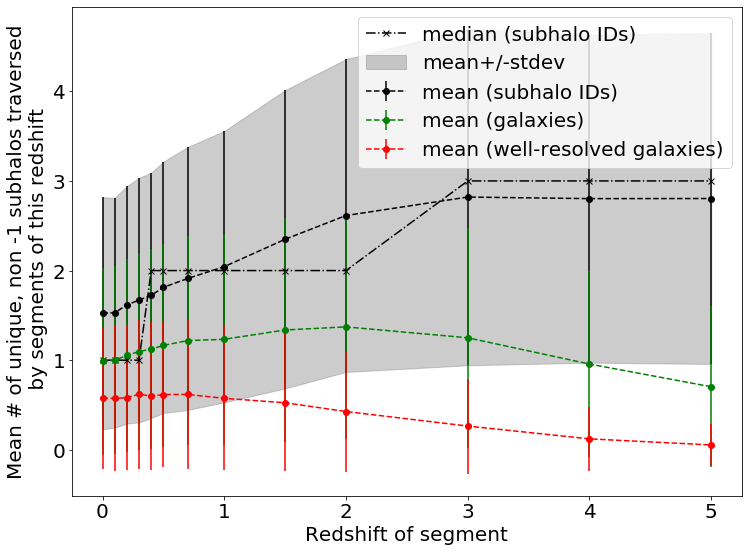

In [36]:
fig = plt.figure(figsize=(12,9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax=fig.add_subplot(111)
ax.set_xlabel('Redshift of segment',fontsize=20)
ax.set_ylabel('Mean # of unique, non -1 subhalos traversed\n by segments of this redshift',fontsize=20)

ax.errorbar(z_list,snaps_shID_mean,
            snaps_shID_stdv,
            ls='--',
           marker='o',
           color='k',
           label='mean (subhalo IDs)')

ax.plot(z_list,
       snaps_shID_median,
       ls='-.',
       marker='x',
       color='k',
       label='median (subhalo IDs)')

ax.fill_between(z_list,
                snaps_shID_mean+(snaps_shID_stdv),
                snaps_shID_mean-(snaps_shID_stdv),
                alpha=0.4,
                color='gray',
                label='mean+/-stdev')


ax.errorbar(z_list,snaps_gals_all_mean,
            snaps_gals_all_stdv,
            ls='--',
           marker='o',
           color='g',
           label='mean (galaxies)')

ax.errorbar(z_list,snaps_gals_wr_mean,
            snaps_gals_wr_stdv,
            ls='--',
           marker='o',
           color='r',
           label='mean (well-resolved galaxies)')


plt.legend(fontsize=20)
plt.savefig('Rough_Plot_Subhalo_Tracing.png',format='png')
plt.show()

## Create subhalo/galaxy data dictionaries

In [37]:
#initialise dictionaries
n_subhalos_traversed_dict = {} #non -1 subhalos
n_gals_all_traversed_dict = {} #galaxies
n_gals_wr_traversed_dict  = {} #well-resolved


#populate dictionarird with the number of unique subhalos
#traversed by each pipe in each snapshot
#and the (well-resolved) galaxies in each snapshot
n_subhalos_traversed_dict['99']=np.array(unique_sh_IDs_99)
n_gals_all_traversed_dict['99']=np.array(unique_gals_all_99)
n_gals_wr_traversed_dict['99']=np.array(unique_gals_wr_99)

n_subhalos_traversed_dict['91']=np.array(unique_sh_IDs_91)
n_gals_all_traversed_dict['91']=np.array(unique_gals_all_91)
n_gals_wr_traversed_dict['91']=np.array(unique_gals_wr_91)

n_subhalos_traversed_dict['84']=np.array(unique_sh_IDs_84)
n_gals_all_traversed_dict['84']=np.array(unique_gals_all_84)
n_gals_wr_traversed_dict['84']=np.array(unique_gals_wr_84)

n_subhalos_traversed_dict['78']=np.array(unique_sh_IDs_78)
n_gals_all_traversed_dict['78']=np.array(unique_gals_all_78)
n_gals_wr_traversed_dict['78']=np.array(unique_gals_wr_78)

n_subhalos_traversed_dict['72']=np.array(unique_sh_IDs_72)
n_gals_all_traversed_dict['72']=np.array(unique_gals_all_72)
n_gals_wr_traversed_dict['72']=np.array(unique_gals_wr_72)

n_subhalos_traversed_dict['67']=np.array(unique_sh_IDs_67)
n_gals_all_traversed_dict['67']=np.array(unique_gals_all_67)
n_gals_wr_traversed_dict['67']=np.array(unique_gals_wr_67)

n_subhalos_traversed_dict['59']=np.array(unique_sh_IDs_59)
n_gals_all_traversed_dict['59']=np.array(unique_gals_all_59)
n_gals_wr_traversed_dict['59']=np.array(unique_gals_wr_59)

n_subhalos_traversed_dict['50']=np.array(unique_sh_IDs_50)
n_gals_all_traversed_dict['50']=np.array(unique_gals_all_50)
n_gals_wr_traversed_dict['50']=np.array(unique_gals_wr_50)

n_subhalos_traversed_dict['40']=np.array(unique_sh_IDs_40)
n_gals_all_traversed_dict['40']=np.array(unique_gals_all_40)
n_gals_wr_traversed_dict['40']=np.array(unique_gals_wr_40)

n_subhalos_traversed_dict['33']=np.array(unique_sh_IDs_33)
n_gals_all_traversed_dict['33']=np.array(unique_gals_all_33)
n_gals_wr_traversed_dict['33']=np.array(unique_gals_wr_33)

n_subhalos_traversed_dict['25']=np.array(unique_sh_IDs_25)
n_gals_all_traversed_dict['25']=np.array(unique_gals_all_25)
n_gals_wr_traversed_dict['25']=np.array(unique_gals_wr_25)

n_subhalos_traversed_dict['21']=np.array(unique_sh_IDs_21)
n_gals_all_traversed_dict['21']=np.array(unique_gals_all_21)
n_gals_wr_traversed_dict['21']=np.array(unique_gals_wr_21)

n_subhalos_traversed_dict['17']=np.array(unique_sh_IDs_17)
n_gals_all_traversed_dict['17']=np.array(unique_gals_all_17)
n_gals_wr_traversed_dict['17']=np.array(unique_gals_wr_17)

## Calculate subhalos/galaxies traversed by one sightline

In [38]:
############
#initialise#
############

#list of snapshots
snap_list = [99,91,84,78,72,67,59,50,40,33,25,21,17]
snap_redshifts = {} #initialise dictionary to hold their redshifts
snap_z_list = [] #initialise array to hold their redshifts

sightline_subhalos = [[0]] #set initial condition to 0 subhalos traversed at z=0
sightline_allgals = [[0]] #set initial condition to 0 galaxies traversed at z=0
sightline_wrgals = [[0]] #set initial condition to 0 well-resolved galaxies traversed at z=0


#################################
#Get redshifts for each snapshot#
#################################

#path to data
sim_to_load = 'TNG300-1' #which simulation to use
basePath = '/virgo/simulations/IllustrisTNG/{0}/output/'.format(sim_to_load)
basePath = '/ptmp/cwalker/Illustris_FRB_Project/TNG_copies/virgo/simulations/IllustrisTNG/{0}/output/'.format(sim_to_load)

#loop over snapshot headers, get redshifts
for snapshot in snap_list: #loop over snapshot
    header = il.groupcat.loadHeader(basePath,int(snapshot)) #extract simulation and snapshot header
    snap_redshifts[str(snapshot)]=header['Redshift'] #append redshift at this snapshot to dict
    snap_z_list.append(header['Redshift']) #append redshift at this snapshot to array
print('snapshot redshifts: {0}\n'.format(snap_z_list))

#################################################
#calculate subhalos traversed by full sightlines#
#################################################

#loop over snapshots
for i in range(len(snap_list)-1):
    
    #get snapshot number of this snapshot
    snap_id = str(snap_list[i])
    #get redshift of this snapshot
    snap_z = snap_z_list[i]
    
    #get snapshot number of next snapshot
    snap_id_ = str(snap_list[i+1])
    #get redshift of next snapshot
    snap_z_ = snap_z_list[i+1] 
    
    print('this i: {0}; this snap_id: {1}; this z: {2}\n'.format(i,snap_id,snap_z))
    print('next i: {0}; next snap_id: {1}; next z: {2}\n'.format(i+1,snap_id_,snap_z_))
  
    
    ################################################################
    #randomly select number of subhalos traversed for this redshift#
    ################################################################
    
    #randomly select pipe (this snapshot)
    rand_pipe_idx = np.random.choice(np.arange(len(n_subhalos_traversed_dict[snap_id])))
    #get the number of subhalos traversed (this snapshot)
    rand_nsubs_traversed = n_subhalos_traversed_dict[snap_id][rand_pipe_idx]
    #get number of galaxies traversed (this snapshot)
    rand_allgals_traversed = n_gals_all_traversed_dict[snap_id][rand_pipe_idx]
    #get number of well-resolved galaxies traversed (this snapshot)
    rand_wrgals_traversed = n_gals_wr_traversed_dict[snap_id][rand_pipe_idx]
    
    ################################################################
    #randomly select number of subhalos traversed for next redshift#
    ################################################################
    
    #randomly select pipe (next snapshot)
    rand_pipe_idx_ = np.random.choice(np.arange(len(n_subhalos_traversed_dict[snap_id_])))
    #get the number of subhalos traversed (next snapshot)
    rand_nsubs_traversed_ = n_subhalos_traversed_dict[snap_id_][rand_pipe_idx_]
    #get number of galaxies traversed (next snapshot)
    rand_allgals_traversed_ = n_gals_all_traversed_dict[snap_id_][rand_pipe_idx_]
    #get number of well-resolved galaxies traversed (next snapshot)
    rand_wrgals_traversed_ = n_gals_wr_traversed_dict[snap_id_][rand_pipe_idx_]

    print('current (next) snapshot number: {0} ({1})'.format(snap_id,snap_id_))
    print('their redshifts: {0} ({1})'.format(snap_z,snap_z_))
    print('their random pipe ids: {0} ({1})'.format(rand_pipe_idx, rand_pipe_idx_))
    print('the number of subhalos traversed by these pipe: {0} ({1})\n'.format(rand_nsubs_traversed,rand_nsubs_traversed_))
    print('the number of galaxies traversed by these pipe: {0} ({1})\n'.format(rand_allgals_traversed,rand_allgals_traversed_))
    print('the number of well-resolved galaxies traversed by these pipe: {0} ({1})\n'.format(rand_wrgals_traversed,rand_wrgals_traversed_))

    
    #need to check bit below on monday!!!
    ###############################################################################################
    #create the total number of subhalos and galaxies traversed by the sightline from these values#
    ###############################################################################################
    
    #non -1 subhalos
    next_subh_val = sightline_subhalos[i] + (0.5*(rand_nsubs_traversed+rand_nsubs_traversed_)*(snap_z_ - snap_z))
    #galaxies
    next_allgal_val = sightline_allgals[i] + (0.5*(rand_allgals_traversed+rand_allgals_traversed_)*(snap_z_ - snap_z))
    #well-resolved galaxies
    next_wrgal_val = sightline_wrgals[i] + (0.5*(rand_wrgals_traversed+rand_wrgals_traversed_)*(snap_z_ - snap_z))

    print('next: {0}'.format(next_subh_val))
    
    sightline_subhalos.append(next_subh_val) #non -1 subhalos
    sightline_allgals.append(next_allgal_val) #galaxies
    sightline_wrgals.append(next_wrgal_val) #well resolved galaxies

    
    
print('Final Results:\nsubhalos: {0}\ngalaxies: {1}\nwell-resolved galaxies: {2}'.format(np.array(sightline_subhalos),
                                                                                        np.array(sightline_allgals),
                                                                                        np.array(sightline_wrgals)))

snapshot redshifts: [2.220446049250313e-16, 0.09940180263022191, 0.19728418237600986, 0.2977176845174465, 0.3999269646135635, 0.5030475232448832, 0.7001063537185233, 0.9972942257819404, 1.4955121664955557, 2.0020281392528516, 3.008131071630377, 4.0079451114652676, 4.995933468164624]

this i: 0; this snap_id: 99; this z: 2.220446049250313e-16

next i: 1; next snap_id: 91; next z: 0.09940180263022191

current (next) snapshot number: 99 (91)
their redshifts: 2.220446049250313e-16 (0.09940180263022191)
their random pipe ids: 1329 (4380)
the number of subhalos traversed by these pipe: 1 (2)

the number of galaxies traversed by these pipe: 1 (1)

the number of well-resolved galaxies traversed by these pipe: 1 (0)

next: [0.1491027]
this i: 1; this snap_id: 91; this z: 0.09940180263022191

next i: 2; next snap_id: 84; next z: 0.19728418237600986

current (next) snapshot number: 91 (84)
their redshifts: 0.09940180263022191 (0.19728418237600986)
their random pipe ids: 1874 (546)
the number of s

## Calculate subhalos/galaxies traversed by many sightlines

In [39]:
#number of lines of sight to generate
nlos = 10000000

#array of 10,000,000 random indices per each snapshot
#pipes to use will be chosen with these indices
pipe_idx_arr = np.array([np.random.choice(np.arange(len(n_subhalos_traversed_dict[str(snap_id)])),size=nlos) for snap_id in snap_list])
print('pipe index array size: {0}'.format(pipe_idx_arr.shape))
print('number of indices per snapshot: {0}'.format(pipe_idx_arr[0].shape))

#get the number of subhalos traversed by these pipes
dNsubdz_arr = np.array([n_subhalos_traversed_dict[str(snap_list[snap])][pipe_idx_arr][snap] for snap in range(len(snap_list))])
dNallgaldz_arr = np.array([n_gals_all_traversed_dict[str(snap_list[snap])][pipe_idx_arr][snap] for snap in range(len(snap_list))])
dNwrgaldz_arr = np.array([n_gals_wr_traversed_dict[str(snap_list[snap])][pipe_idx_arr][snap] for snap in range(len(snap_list))])
print('subhalos traversed by these pipes: {0}'.format(np.array(dNsubdz_arr).shape))
print('galaxies traversed by these pipes: {0}'.format(np.array(dNallgaldz_arr).shape))
print('well-resolved galaxies traversed by these pipes: {0}'.format(np.array(dNwrgaldz_arr).shape))

#create array of redshifts:
z_arr = np.array([snap_redshifts[str(snap_id)] for snap_id in snap_list])
print('array of redshifts: {0}'.format(z_arr))

#perform the calculation to get pipes traversed at each redshift
nsubs_traversed_arr = (0.5*(dNsubdz_arr[:,:][0:-1]+dNsubdz_arr[:,:][1:]))*(z_arr[:][1:]-z_arr[:][0:-1])[:,None]
allgals_traversed_arr = (0.5*(dNallgaldz_arr[:,:][0:-1]+dNallgaldz_arr[:,:][1:]))*(z_arr[:][1:]-z_arr[:][0:-1])[:,None]
wrgals_traversed_arr = (0.5*(dNwrgaldz_arr[:,:][0:-1]+dNwrgaldz_arr[:,:][1:]))*(z_arr[:][1:]-z_arr[:][0:-1])[:,None]
print('array of pipes traversed at each redshift: {0}'.format(nsubs_traversed_arr.shape))
print('array of pipes traversed at each redshift: {0}'.format(allgals_traversed_arr.shape))
print('array of pipes traversed at each redshift: {0}'.format(wrgals_traversed_arr.shape))

#add the initial condition of n subhalos traversed =0 @z=0
nsubs_traversed_arr = np.insert(nsubs_traversed_arr,0,np.zeros(nlos),axis=0)
allgals_traversed_arr = np.insert(allgals_traversed_arr,0,np.zeros(nlos),axis=0)
wrgals_traversed_arr = np.insert(wrgals_traversed_arr,0,np.zeros(nlos),axis=0)
print('array when initial 0 @ z=0 is added: {0}'.format(nsubs_traversed_arr.shape))
print('array when initial 0 @ z=0 is added: {0}'.format(allgals_traversed_arr.shape))
print('array when initial 0 @ z=0 is added: {0}'.format(wrgals_traversed_arr.shape))

#perform the cumulative sum to get the cDM for each light ray
cNsubs_arr = np.cumsum(nsubs_traversed_arr,axis=0)
cNallgals_arr = np.cumsum(allgals_traversed_arr,axis=0)
cNwrgals_arr = np.cumsum(wrgals_traversed_arr,axis=0)
print('cumulative summed: {0}'.format(cNsubs_arr.shape))
print('cumulative summed: {0}'.format(cNallgals_arr.shape))
print('cumulative summed: {0}'.format(cNwrgals_arr.shape))

pipe index array size: (13, 10000000)
number of indices per snapshot: (10000000,)
subhalos traversed by these pipes: (13, 10000000)
galaxies traversed by these pipes: (13, 10000000)
well-resolved galaxies traversed by these pipes: (13, 10000000)
array of redshifts: [2.22044605e-16 9.94018026e-02 1.97284182e-01 2.97717685e-01
 3.99926965e-01 5.03047523e-01 7.00106354e-01 9.97294226e-01
 1.49551217e+00 2.00202814e+00 3.00813107e+00 4.00794511e+00
 4.99593347e+00]
array of pipes traversed at each redshift: (12, 10000000)
array of pipes traversed at each redshift: (12, 10000000)
array of pipes traversed at each redshift: (12, 10000000)
array when initial 0 @ z=0 is added: (13, 10000000)
array when initial 0 @ z=0 is added: (13, 10000000)
array when initial 0 @ z=0 is added: (13, 10000000)
cumulative summed: (13, 10000000)
cumulative summed: (13, 10000000)
cumulative summed: (13, 10000000)


## Calculate statistics of subhalos/galaxies traversed by sightlines

In [40]:
#calculate statistics

#non- -1 subhalos
mean_cNsubs = np.mean(cNsubs_arr,axis=1)
medi_cNsubs = np.median(cNsubs_arr,axis=1)
stdv_cNsubs = np.std(cNsubs_arr,axis=1)

#all galaxies
mean_cNallgals = np.mean(cNallgals_arr,axis=1)
medi_cNallgals = np.median(cNallgals_arr,axis=1)
stdv_cNallgals = np.std(cNallgals_arr,axis=1)

#well-resolved galaxies
mean_cNwrgals = np.mean(cNwrgals_arr,axis=1)
medi_cNwrgals = np.median(cNwrgals_arr,axis=1)
stdv_cNwrgals = np.std(cNwrgals_arr,axis=1)


print('Shapes: {0}, {1}, {2}'.format(mean_cNsubs.shape,medi_cNsubs.shape,stdv_cNsubs.shape))

Shapes: (13,), (13,), (13,)


## Plot the statistics of subhalos/galaxies traversed by sightlines

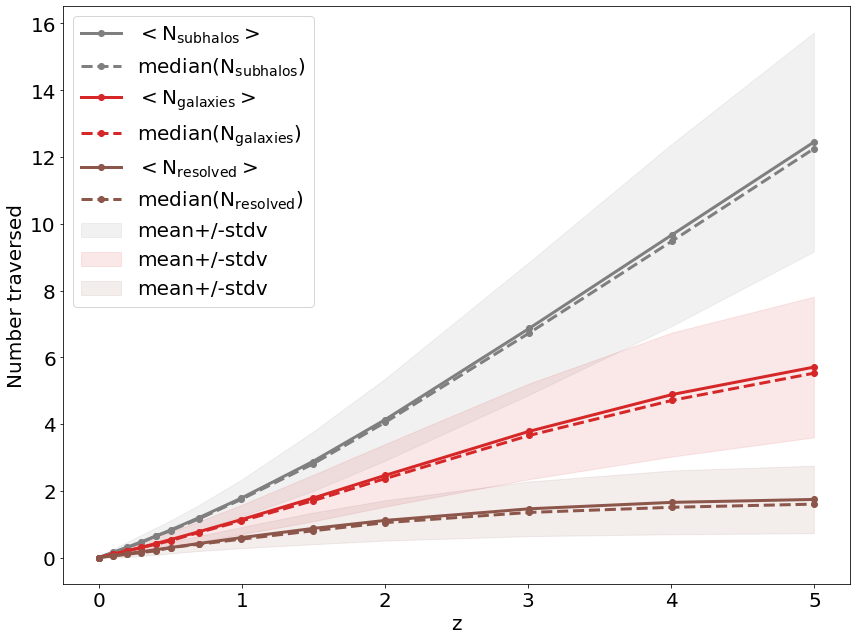

In [99]:
##################
#initialise plots#
##################

fig = plt.figure(figsize=(12,9))


ax1 = fig.add_subplot(111)
ax1.set_xlabel('z',fontsize=20)
ax1.set_ylabel('Number traversed',fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)

#non -1 subhalos
ax1.plot(snap_z_list,mean_cNsubs,marker='o',color='C7',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{subhalos}}>$')
ax1.plot(snap_z_list,medi_cNsubs,marker='o',color='C7',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{subhalos})}$')
ax1.fill_between(snap_z_list,mean_cNsubs+stdv_cNsubs,mean_cNsubs-stdv_cNsubs,alpha=0.1,color='C7',label='mean+/-stdv')

#galaxies
ax1.plot(snap_z_list,mean_cNallgals,marker='o',color='C3',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{galaxies}}>$')
ax1.plot(snap_z_list,medi_cNallgals,marker='o',color='C3',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{galaxies})}$')
ax1.fill_between(snap_z_list,mean_cNallgals+stdv_cNallgals,mean_cNallgals-stdv_cNallgals,alpha=0.1,color='C3',label='mean+/-stdv')

#well-resolved galaxies 
ax1.plot(snap_z_list,mean_cNwrgals,marker='o',color='C5',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{resolved}}>$')
ax1.plot(snap_z_list,medi_cNwrgals,marker='o',color='C5',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{resolved})}$')
ax1.fill_between(snap_z_list,mean_cNwrgals+stdv_cNwrgals,mean_cNwrgals-stdv_cNwrgals,alpha=0.1,color='C5',label='mean+/-stdv')


ax1.legend(fontsize=20)
plt.tight_layout()
plt.savefig('Paper_Plot_Subhalo_Tracing_{0}.png'.format(sim_to_load),format='png')
plt.show()

#note: not all subhalos are galaxies. 
#Could do another version of this and cut non-galaxy subhalos (based on number of stellar particles)
#also need to do impact factors.

# Impact factor bit

## Load impact factor data as dictionaries

In [54]:
#initialise dictionaries
impact_factor_shID_dict = {} #unique non- -1 subhalo IDs
impact_factor_gals_all_dict = {} #of which are galaxies
impact_factor_gals_wr_dict = {} #of which are well-resolved galaxies

#loop over snapshots
for i in ([99,91,84,78,72,67,59,50,40,33,25,21,17]):
    
    #load impact factor data
    data_shIDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_ImpactFacts_sh.npy'.format(i),allow_pickle=True)
    data_gals_all = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_ImpactFacts_gal.npy'.format(i),allow_pickle=True)
    data_gals_wr = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/Snap_{0}_ImpactFacts_wrg.npy'.format(i),allow_pickle=True)
    
    #add to dictionaries
    impact_factor_shID_dict['{0}'.format(i)]= data_shIDs
    impact_factor_gals_all_dict['{0}'.format(i)]= data_gals_all
    impact_factor_gals_wr_dict['{0}'.format(i)]= data_gals_wr

## Loop over snapshots, get statistics

In [83]:
###################################################
#initialise arrays to hold stats for all snapshots#
###################################################

#means
impact_factor_mean_shIDs = [] #non- -1 subhalo IDs
impact_factor_mean_gals_all = [] #of which are galaxies
impact_factor_mean_gals_wr = [] #of which are well-resolved galaxies

#medians
impact_factor_median_shIDs = [] #non- -1 subhalo IDs
impact_factor_median_gals_all = [] #of which are galaxies
impact_factor_median_gals_wr = [] #of which are well-resolved galaxies

#standard deviations
impact_factor_std_shIDs = [] #non- -1 subhalo IDs
impact_factor_std_gals_all = [] #of which are galaxies
impact_factor_std_gals_wr = [] #of which are well-resolved galaxies


#######################################################
#loop over each snapshot in dictionary, get statistics#
#######################################################

#loop over snapshots
for key in impact_factor_shID_dict.keys():
    print('Processing snapshot {0}'.format(key))
    
    #get list of impact factors to subhalo IDs
    data_shIDs = np.concatenate(impact_factor_shID_dict[key])
    
    #get list of impact factors to galaxies
    data_gals_all = np.concatenate(impact_factor_gals_all_dict[key])
    
    #get list of impact factors to well-resolved galaxies
    data_gals_wr = np.concatenate(impact_factor_gals_wr_dict[key])
    
    #append to arrays
    impact_factor_mean_shIDs.append(np.mean(data_shIDs))
    impact_factor_mean_gals_all.append(np.mean(data_gals_all))
    impact_factor_mean_gals_wr.append(np.mean(data_gals_wr))

    impact_factor_median_shIDs.append(np.median(data_shIDs))
    impact_factor_median_gals_all.append(np.median(data_gals_all))
    impact_factor_median_gals_wr.append(np.median(data_gals_wr))
    
    impact_factor_std_shIDs.append(np.std(data_shIDs))
    impact_factor_std_gals_all.append(np.std(data_gals_all))
    impact_factor_std_gals_wr.append(np.std(data_gals_wr))
                                    
    print('done')
    
#means
impact_factor_mean_shIDs = np.array(impact_factor_mean_shIDs) #non- -1 subhalo IDs
impact_factor_mean_gals_all = np.array(impact_factor_mean_gals_all) #of which are galaxies
impact_factor_mean_gals_wr = np.array(impact_factor_mean_gals_wr) #of which are well-resolved galaxies

#medians
impact_factor_median_shIDs = np.array(impact_factor_median_shIDs) #non- -1 subhalo IDs
impact_factor_median_gals_all = np.array(impact_factor_median_gals_all) #of which are galaxies
impact_factor_median_gals_wr = np.array(impact_factor_median_gals_wr) #of which are well-resolved galaxies

#standard deviations
impact_factor_std_shIDs = np.array(impact_factor_std_shIDs) #non- -1 subhalo IDs
impact_factor_std_gals_all = np.array(impact_factor_std_gals_all) #of which are galaxies
impact_factor_std_gals_wr = np.array(impact_factor_std_gals_wr) #of which are well-resolved galaxies

Processing snapshot 99
done
Processing snapshot 91
done
Processing snapshot 84
done
Processing snapshot 78
done
Processing snapshot 72
done
Processing snapshot 67
done
Processing snapshot 59
done
Processing snapshot 50
done
Processing snapshot 40
done
Processing snapshot 33
done
Processing snapshot 25
done
Processing snapshot 21
done
Processing snapshot 17
done


## Plot the impact factor statistics

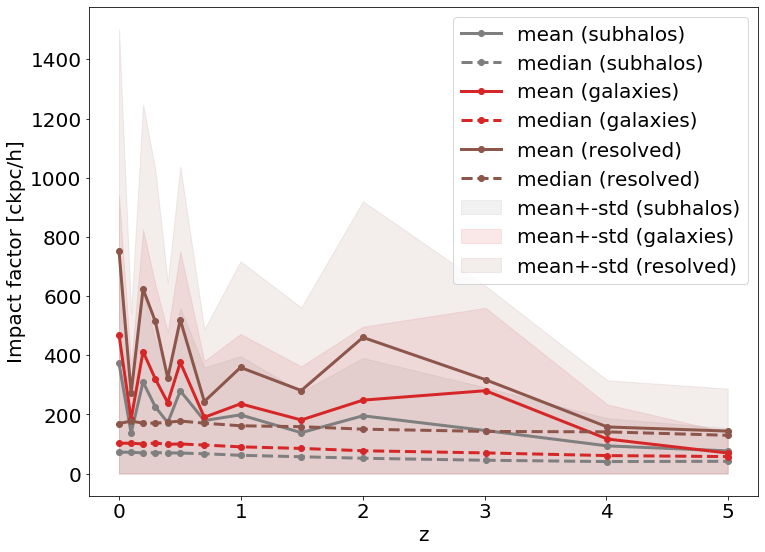

In [98]:
#initialise figure
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.tick_params(axis='both',which='major',labelsize=20)
ax.set_xlabel('z',fontsize=20)
ax.set_ylabel('Impact factor [ckpc/h]',fontsize=20)

#plot for non- -1 subhalo ids
ax.plot(snap_z_list,impact_factor_mean_shIDs,marker='o',lw=3,ls='-',color='C7',label='mean (subhalos)')
ax.plot(snap_z_list,impact_factor_median_shIDs,marker='o',lw=3,ls='--',color='C7',label='median (subhalos)')
ax.fill_between(snap_z_list,
                impact_factor_mean_shIDs+impact_factor_mean_shIDs,
                impact_factor_mean_shIDs-impact_factor_mean_shIDs,
                color='C7',alpha=0.1,label='mean+-std (subhalos)')


#plot for galaxies
ax.plot(snap_z_list,impact_factor_mean_gals_all,marker='o',lw=3,ls='-',color='C3',label='mean (galaxies)')
ax.plot(snap_z_list,impact_factor_median_gals_all,marker='o',lw=3,ls='--',color='C3',label='median (galaxies)')
ax.fill_between(snap_z_list,
                impact_factor_mean_gals_all+impact_factor_mean_gals_all,
                impact_factor_mean_gals_all-impact_factor_mean_gals_all,
                color='C3',alpha=0.1,label='mean+-std (galaxies)')

#plot for well-resolved galaxies
ax.plot(snap_z_list,impact_factor_mean_gals_wr,marker='o',lw=3,ls='-',color='C5',label='mean (resolved)')
ax.plot(snap_z_list,impact_factor_median_gals_wr,marker='o',lw=3,ls='--',color='C5',label='median (resolved)')
ax.fill_between(snap_z_list,
                impact_factor_mean_gals_wr+impact_factor_mean_gals_wr,
                impact_factor_mean_gals_wr-impact_factor_mean_gals_wr,
                color='C5',alpha=0.1,label='mean+-std (resolved)')

plt.legend(fontsize=20)
plt.show()

## Plot histograms to see what statistic should be used

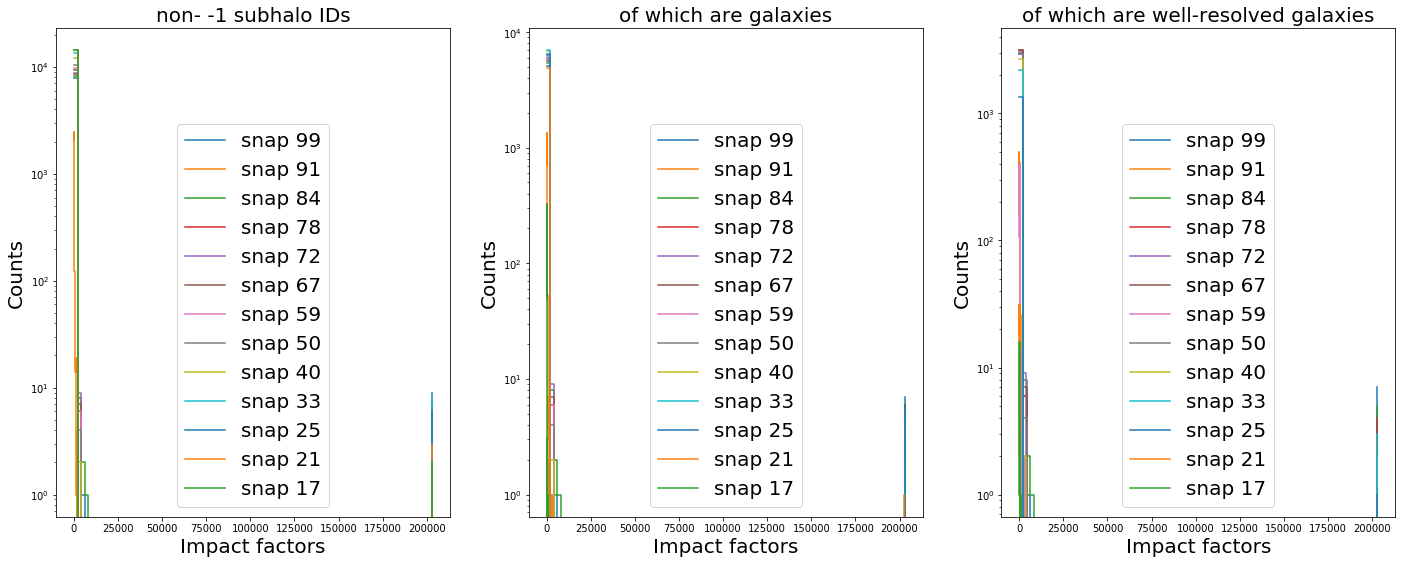

In [165]:
#plot all hists for each type of collapsed structure

fig = plt.figure(figsize=(24,9))

#subplot for subhalo IDs
ax1 = fig.add_subplot(131)
ax1.set_xlabel('Impact factors',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
#ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('non- -1 subhalo IDs',fontsize=20)

#subplot for galaxies
ax2 = fig.add_subplot(132)
ax2.set_xlabel('Impact factors',fontsize=20)
ax2.set_ylabel('Counts',fontsize=20)
ax2.set_yscale('log')
ax2.set_title('of which are galaxies',fontsize=20)


#subplot for well-resolved galaxies
ax3 = fig.add_subplot(133)
ax3.set_xlabel('Impact factors',fontsize=20)
ax3.set_ylabel('Counts',fontsize=20)
ax3.set_yscale('log')
ax3.set_title('of which are well-resolved galaxies',fontsize=20)


#loop over snapshots
for key in impact_factor_shID_dict.keys():
    
    #get list of impact factors to non- -1 subhalo IDs
    data_shIDs = np.concatenate(impact_factor_shID_dict[key])
    #get list of impact factors to galaxies
    data_gals_all = np.concatenate(impact_factor_gals_all_dict[key])
    #get list of impact factors to well-resolved galaxies
    data_gals_wr = np.concatenate(impact_factor_gals_wr_dict[key])
    
    #histogram these lists
    counts_shIDs, bin_edges_shIDs = np.histogram(data_shIDs,bins=100,density=0) # non- -1 subhalo IDs
    counts_gals_all, bin_edges_gals_all = np.histogram(data_gals_all,bins=100,density=0) #galaxies
    counts_gals_wr, bin_edges_gals_wr = np.histogram(data_gals_wr,bins=100,density=0) #well resolved galaxies

    #plot them
    #ax1.hist(data_shIDs,bins=100,alpha=0.3,density=True)
    ax1.step(x=bin_edges_shIDs[:-1], y=counts_shIDs, where='post',label='snap {0}'.format(key))
    ax2.step(x=bin_edges_gals_all[:-1], y=counts_gals_all, where='post',label='snap {0}'.format(key))
    ax3.step(x=bin_edges_gals_wr[:-1], y=counts_gals_wr, where='post',label='snap {0}'.format(key))

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax3.legend(fontsize=20)

plt.show()

    



Note: they are not Gaussian, so we should probably use the median and percentiles rather than mean and stdv

## Plot close-up of one histogram to get the 69 and 95% confidence intervals

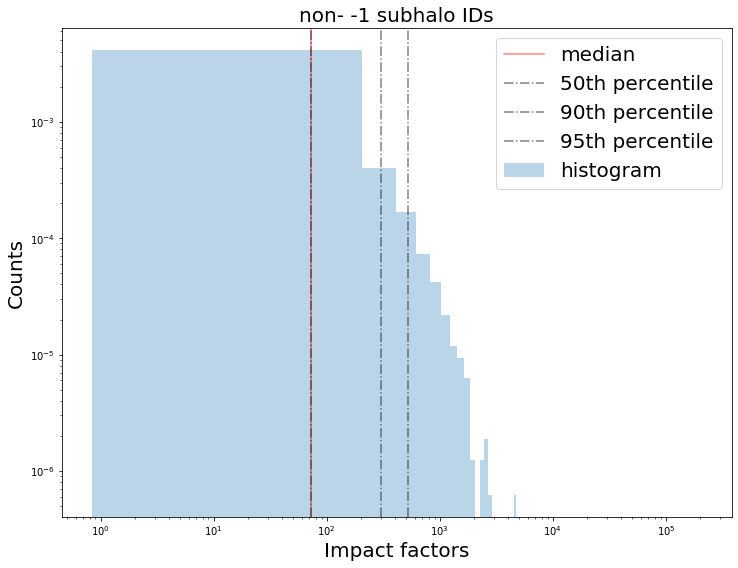

In [242]:
fig = plt.figure(figsize=(12,9))

#subplot for subhalo IDs
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Impact factors',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('non- -1 subhalo IDs',fontsize=20)



key='99'
    
#get list of impact factors to non- -1 subhalo IDs
data_shIDs = np.concatenate(impact_factor_shID_dict[key])

#histogram these lists
counts_shIDs, bin_edges_shIDs = np.histogram(data_shIDs,bins=1000,density=1) # non- -1 subhalo IDs

#plot them
ax1.hist(data_shIDs,bins=1000,alpha=0.3,density=1,label='histogram')
#ax1.step(x=bin_edges_shIDs[:-1], y=counts_shIDs, where='post',label='snap {0}'.format(key))

#plot median as a check
ax1.axvline(impact_factor_median_shIDs[0],color='r',alpha=0.5,label='median')

#plot percentiles (50th percentile should equal the median)
# https://en.wikipedia.org/wiki/Percentile
test_percentile = np.percentile(data_shIDs,[50,90,95])
ax1.axvline(test_percentile[0],color='k',linestyle='-.',alpha=0.5,label='50th percentile')
ax1.axvline(test_percentile[1],color='k',linestyle='-.',alpha=0.5,label='90th percentile')
ax1.axvline(test_percentile[2],color='k',linestyle='-.',alpha=0.5,label='95th percentile')

ax1.legend(fontsize=20)

plt.show()

## Calculate percentiles for all histograms

In [259]:
#initialise array to hold the percentiles
all_percentiles_shIDs = [] #non- -1 subhalos
all_percentiles_gals_all = [] #all galaxies
all_percentiles_gals_wr = [] #well-resolved galaxies

#loop over snapshots
for key in impact_factor_shID_dict.keys():
    
    #get lists of impact factors
    data_shIDs = np.concatenate(impact_factor_shID_dict[key]) #to non- -1 subhalo IDs
    data_gals_all = np.concatenate(impact_factor_gals_all_dict[key]) #to all galaxies
    data_gals_wr = np.concatenate(impact_factor_gals_wr_dict[key]) #to all well-resolved galaxies

    
    #get the desired percentiles for this snapshot
    percentiles_shIDs = np.percentile(data_shIDs,[50,90,95]) #for non- -1 subhalo IDs
    percentiles_gals_all = np.percentile(data_gals_all,[50,90,95]) #for non- -1 subhalo IDs
    percentiles_gals_wr = np.percentile(data_gals_wr,[50,90,95]) #for non- -1 subhalo IDs
    
    #append to array
    all_percentiles_shIDs.append(percentiles_shIDs)
    all_percentiles_gals_all.append(percentiles_gals_all)
    all_percentiles_gals_wr.append(percentiles_gals_wr)

    
all_percentiles_shIDs=np.array(all_percentiles_shIDs)
all_percentiles_gals_all=np.array(all_percentiles_gals_all)
all_percentiles_gals_wr=np.array(all_percentiles_gals_wr)

print('Percentiles for non- -1 subhalos: {0}'.format(all_percentiles_shIDs))
print('Only the 50th percentiles: {0}'.format(all_percentiles_shIDs[:,0]))
print('Only the 90th percentiles: {0}'.format(all_percentiles_shIDs[:,1]))
print('Only the 95th percentiles: {0}'.format(all_percentiles_shIDs[:,2]))


    
    
    


Percentiles for non- -1 subhalos: [[ 72.32719334 303.08284365 528.8656837 ]
 [ 72.12924736 305.85841092 498.43548274]
 [ 69.61016498 293.67765415 511.19249941]
 [ 70.82685531 281.32129152 468.88611778]
 [ 70.00122336 268.70165795 438.55973432]
 [ 69.31140777 273.45803041 442.06996069]
 [ 67.02294487 247.2006766  389.87228134]
 [ 61.673176   211.58247854 323.15232431]
 [ 56.82601376 178.76277663 257.59086087]
 [ 51.74204994 146.70721795 202.82358891]
 [ 44.98037569 118.51147605 158.64953844]
 [ 40.53848808  93.25784927 122.48034216]
 [ 41.41286692  85.08896848 105.36499574]]
Only the 50th percentiles: [72.32719334 72.12924736 69.61016498 70.82685531 70.00122336 69.31140777
 67.02294487 61.673176   56.82601376 51.74204994 44.98037569 40.53848808
 41.41286692]
Only the 90th percentiles: [303.08284365 305.85841092 293.67765415 281.32129152 268.70165795
 273.45803041 247.2006766  211.58247854 178.76277663 146.70721795
 118.51147605  93.25784927  85.08896848]
Only the 95th percentiles: [528.

# Combine for paper plot

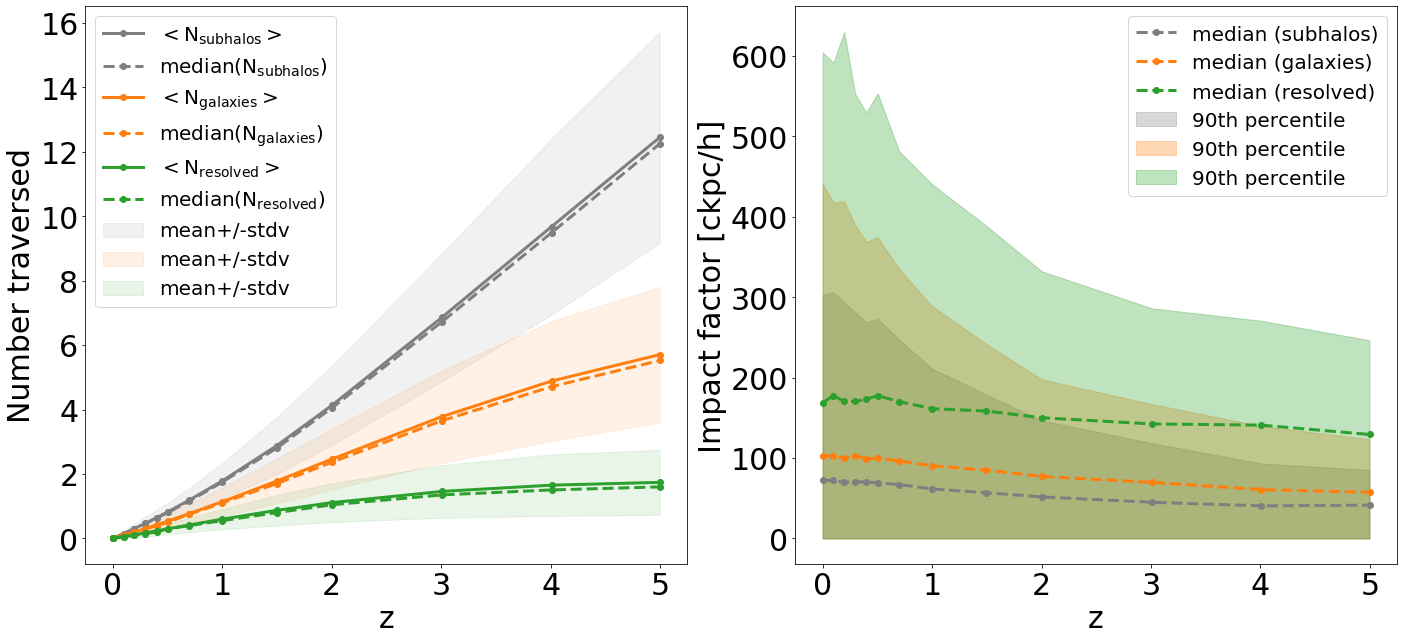

In [260]:
#################
#initialise plot#
#################

fig = plt.figure(figsize=(20,9))


ax1 = fig.add_subplot(121)
ax1.set_xlabel('z',fontsize=30)
ax1.set_ylabel('Number traversed',fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('z',fontsize=30)
ax2.set_ylabel('Impact factor [ckpc/h]',fontsize=30)
ax2.tick_params(axis='both',which='major',labelsize=30)

#########################
#Plot subhalos traversed#
#########################

#non -1 subhalos
ax1.plot(snap_z_list,mean_cNsubs,marker='o',color='C7',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{subhalos}}>$')
ax1.plot(snap_z_list,medi_cNsubs,marker='o',color='C7',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{subhalos})}$')
ax1.fill_between(snap_z_list,mean_cNsubs+stdv_cNsubs,mean_cNsubs-stdv_cNsubs,alpha=0.1,color='C7',label='mean+/-stdv')

#galaxies
ax1.plot(snap_z_list,mean_cNallgals,marker='o',color='C1',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{galaxies}}>$')
ax1.plot(snap_z_list,medi_cNallgals,marker='o',color='C1',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{galaxies})}$')
ax1.fill_between(snap_z_list,mean_cNallgals+stdv_cNallgals,mean_cNallgals-stdv_cNallgals,alpha=0.1,color='C1',label='mean+/-stdv')

#well-resolved galaxies 
ax1.plot(snap_z_list,mean_cNwrgals,marker='o',color='C2',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{resolved}}>$')
ax1.plot(snap_z_list,medi_cNwrgals,marker='o',color='C2',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{resolved})}$')
ax1.fill_between(snap_z_list,mean_cNwrgals+stdv_cNwrgals,mean_cNwrgals-stdv_cNwrgals,alpha=0.1,color='C2',label='mean+/-stdv')

ax1.legend(fontsize=20)

#####################
#Plot impact factors#
#####################

#plot for non- -1 subhalo ids
ax2.plot(snap_z_list,impact_factor_median_shIDs,marker='o',lw=3,ls='--',color='C7',label='median (subhalos)')

#plot for galaxies
ax2.plot(snap_z_list,impact_factor_median_gals_all,marker='o',lw=3,ls='--',color='C1',label='median (galaxies)')

#plot for well-resolved galaxies
ax2.plot(snap_z_list,impact_factor_median_gals_wr,marker='o',lw=3,ls='--',color='C2',label='median (resolved)')


#######################
#plot 90th percentiles#
#######################

#plot for non- -1 subhalo ids
ax2.fill_between(snap_z_list,
                 np.zeros_like(snap_z_list),
                 all_percentiles_shIDs[:,1],
                 color='C7',
                 alpha=0.3,
                 label='90th percentile')

#plot for galaxies
ax2.fill_between(snap_z_list,
                 np.zeros_like(snap_z_list),
                 all_percentiles_gals_all[:,1],
                 color='C1',
                 alpha=0.3,
                 label='90th percentile')

#plot for well-resolved galaxies
ax2.fill_between(snap_z_list,
                 np.zeros_like(snap_z_list),
                 all_percentiles_gals_wr[:,1],
                 color='C2',
                 alpha=0.3,
                 label='90th percentile')

ax2.legend(fontsize=20)

plt.tight_layout()
plt.savefig('Paper_Plot_Subhalo_Impact_Tracing_{0}.png'.format(sim_to_load),format='png')
plt.show()


## Get Impact Factors of CHIME FRBs from Connor+Ravi 2021

In [270]:
Connor_Dict = {} #initialise data dictionary

#import data from table 1 of https://ui.adsabs.harvard.edu/abs/2022NatAs...6.1035C

#FRB names
Connor_Dict['FRB']=['FRB20190223B',
                    'FRB20190430B',
                    'FRB20190423A',
                    'FRB20181214C',
                    'FRB20190612A',
                    'FRB20190701D',
                    'FRB20180925A',
                    'FRB20190211A',
                    'FRB20190130A',
                    'FRB20190128A',
                    'FRB20190217B',
                    'FRB20190226C',
                    'FRB20190605D',
                    'FRB20190607A',
                    'FRB20181018A',
                    'FRB20181101A',
                    'FRB20181129A',
                    'FRB20181130A',
                    'FRB20181224A',
                    'FRB20190102A',
                    'FRB20190106A',
                    'FRB20190116E',
                    'FRB20190122B',
                    'FRB20190415B',
                    'FRB20190614C',
                    'FRB20190628C']

#Impact parameters, Rparallel (kpc)
Connor_Dict['Impact']=[153,
                       19,
                       48,
                       69,
                       52,
                       78,
                       80,
                       221,
                       76,
                       90,
                       54,
                       95,
                       51,
                       108,
                       154,
                       200,
                       165,
                       170,
                       163,
                       202,
                       132,
                       173,
                       123,
                       188,
                       170,
                       101]

Connor_Dict['DM']=[411.8,
                   2583.00,
                   211.0,
                   599.5,
                   390.6,
                   877.4,
                   167.1,
                   1084.40,
                   1330.10,
                   652.5,
                   800.4,
                   783.3,
                   1607.70,
                   518.5,
                   1008.50,
                   1327.80,
                   299.2,
                   125.0,
                   225.2,
                   655.6,
                   251.2,
                   1362.60,
                   415.1,
                   567.6,
                   531.7,
                   1649.60]

#names of the galaxies intersected
Connor_Dict['Gal_names'] = ['NGC6946',
                            'NGC6015',
                            'NGC3998',
                            'NGC3835',
                            'NGC3034',
                            'NGC2403',
                            'IC0391',
                            'IC0342',
                            'NGC0660',
                            'M33',
                            'M33',
                            'M33',
                            'M33',
                            'M33',
                            'M31',
                            'M31',
                            'M31',
                            'M31',
                            'M31',
                            'M31',
                            'M31',
                            'M31',
                            'M31',
                            'M31',
                            'M31',
                            'M31']

#the redshifts of the galaxies, according to NED
#note: NED gives a negative redshift (i.e. a blueshift) for both M31 and M33. They are in the local group.
#should I set these to zero for the purpose of our calculations? i.e. cosmological redshift?
##But discuss further...
Connor_Dict['Gal_redshifts'] = [0.00013,
                                0.00278,
                                0.00350,
                                0.00815,
                                0.00090,
                                0.00044,
                                0.00519,
                                0.00010,
                                0.00283,
                                -0.00060,
                                -0.00060,
                                -0.00060,
                                -0.00060,
                                -0.00060,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100,
                                -0.00100]


## Get Impact factors from FRB intersections reported in Connor et al. 2020

In [314]:
#Initialise
Connor_Dict_2={}

#frb details
Connor_Dict_2['FRB']=['FRB121108']
Connor_Dict_2['DM']= [588.1]

#galaxies it intersects details
Connor_Dict_2['Gal_names']=[['M33','M31']]
Connor_Dict_2['Gal_redshifts']=[[-0.00060,-0.00100]]
Connor_Dict_2['Impact']=[[18,185]] #kpc

## Get impact factors from FRB intersections reported in Prochaska et al., 2019

In [315]:
#Initialise
Prochaska_Dict={}

#frb details
Prochaska_Dict['FRB']=['FRB181112']
Prochaska_Dict['DM']= [589.27]

#galaxies it intersects details
Prochaska_Dict['Gal_names']=[['DES J214923.89-525810.43']]
Prochaska_Dict['Gal_redshifts']=[[0.36738]]
Prochaska_Dict['Impact']=[[29]] #kpc

## convert to plottable units

In [316]:
#get the scale factor for each galaxy 
#scale factor a = 1/1+z (https://www.tng-project.org/data/docs/specifications/#sec5v)

Connor_Dict_gal_scale_factors   = [1./(1+i) for i in Connor_Dict['Gal_redshifts']] #Connor and Ravi 2021
Connor_Dict_2_gal_scale_factors = [1./(1+i) for i in Connor_Dict_2['Gal_redshifts'][0]] #Connor et al 2020
Prochaska_Dict_gal_scale_factors = [1./(1+i) for i in Prochaska_Dict['Gal_redshifts'][0]] #Prochaska et al 2019

print(Connor_Dict_gal_scale_factors,'\n\n',Connor_Dict_2_gal_scale_factors)

[0.9998700168978033, 0.9972277069746106, 0.996512207274539, 0.9919158855329067, 0.9991008092716556, 0.9995601935148535, 0.9948367970234483, 0.9999000099990001, 0.9971779862987744, 1.0006003602161297, 1.0006003602161297, 1.0006003602161297, 1.0006003602161297, 1.0006003602161297, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001, 1.001001001001001] 

 [1.0006003602161297, 1.001001001001001]


In [317]:
#define h (= 0.6774): https://www.tng-project.org/data/docs/background/

h=0.6774

In [318]:
#convert the galaxy impact factors to ckpc/h

#Examples of calculation are at: 
#https://www.illustris-project.org/data/forum/topic/194/distance-ckpch/
#https://www.illustris-project.org/data/forum/topic/556/conversion-from-comoving-to-physical-coordinates/

######################
#Connor and Ravi 2021#
######################

Connor_Dict_gal_impacts_ckpch = [] #initialise array

for i in range(len(Connor_Dict['Gal_names'])): #loop over FRBs
    
    impact_kpc = Connor_Dict['Impact'][i] #get the original physical impact parameter
    scale_fact = Connor_Dict_gal_scale_factors[i] #get the scale factor at the redshift of the frb
    impact_ckpch = (impact_kpc*h)/scale_fact #calculate impact parameter in ckpc/h
    Connor_Dict_gal_impacts_ckpch.append(impact_ckpch) #append to array
    
    
print(Connor_Dict_gal_impacts_ckpch)    

###################
#Connor et al 2020#
###################

Connor_Dict_2_gal_impacts_ckpch = [] #initialise array

for i in range(len(Connor_Dict_2['Gal_names'][0])): #loop over FRBs
        
    impact_kpc = Connor_Dict_2['Impact'][0][i] #get the original physical impact parameter
    scale_fact = Connor_Dict_2_gal_scale_factors[i] #get the scale factor at the redshift of the frb
    impact_ckpch = (impact_kpc*h)/scale_fact #calculate impact parameter in ckpc/h
    Connor_Dict_2_gal_impacts_ckpch.append(impact_ckpch) #append to array
    
print('\n')
print(Connor_Dict_2_gal_impacts_ckpch)  
    

######################
#Prochaska et al 2019#
######################

Prochaska_Dict_gal_impacts_ckpch = [] #initialise array

for i in range(len(Prochaska_Dict['Gal_names'][0])): #loop over FRBs
        
    impact_kpc = Prochaska_Dict['Impact'][0][i] #get the original physical impact parameter
    scale_fact = Prochaska_Dict_gal_scale_factors[i] #get the scale factor at the redshift of the frb
    impact_ckpch = (impact_kpc*h)/scale_fact #calculate impact parameter in ckpc/h
    Prochaska_Dict_gal_impacts_ckpch.append(impact_ckpch) #append to array
    
print('\n')
print(Prochaska_Dict_gal_impacts_ckpch)  


[103.655673486, 12.906380268, 32.6290032, 47.12153589000001, 35.25650232, 52.860448368, 54.47325648, 149.72037054, 51.628095192, 60.9294204, 36.557652239999996, 64.3143882, 34.526671560000004, 73.11530447999999, 104.21528039999998, 135.34452, 111.659229, 115.042842, 110.3057838, 136.6979652, 89.32738319999999, 117.0730098, 83.2368798, 127.2238488, 115.042842, 68.3489826]


[12.18588408, 125.193681]


[26.861633148000003]


## Overplot Connor+Ravi 2021 impact factors on TNG statistics

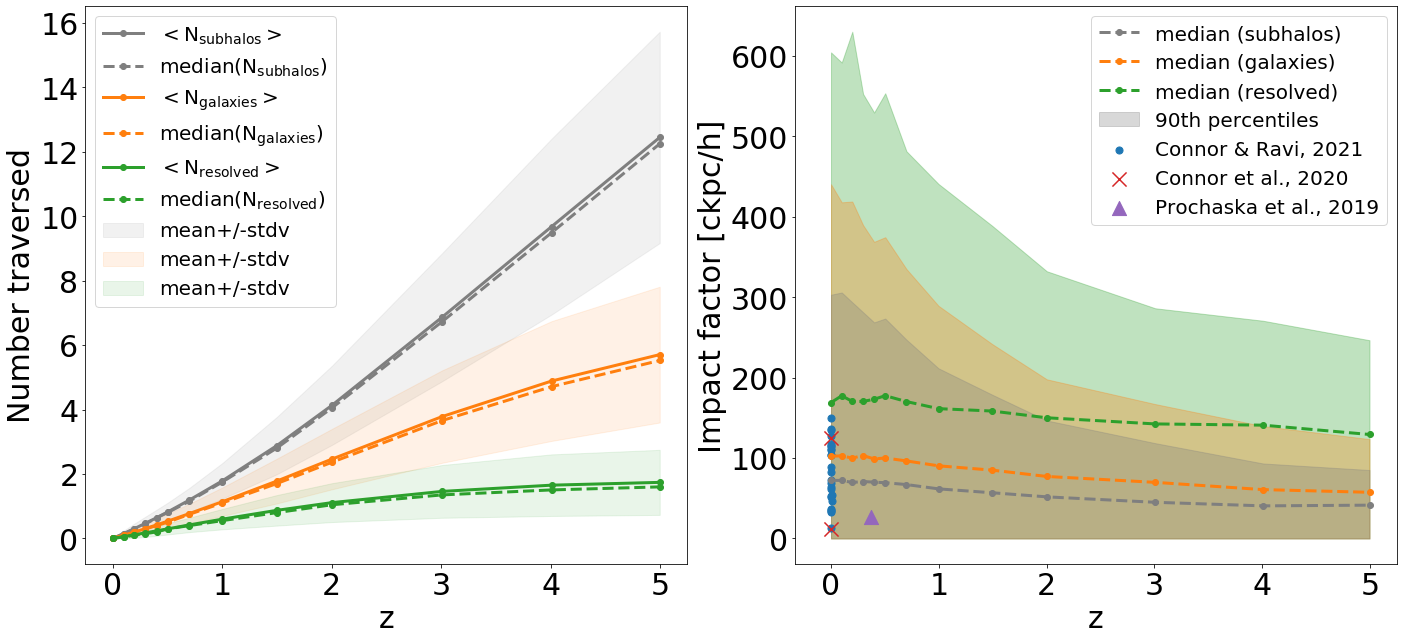

In [320]:
#################
#initialise plot#
#################

fig = plt.figure(figsize=(20,9))


ax1 = fig.add_subplot(121)
ax1.set_xlabel('z',fontsize=30)
ax1.set_ylabel('Number traversed',fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('z',fontsize=30)
ax2.set_ylabel('Impact factor [ckpc/h]',fontsize=30)
ax2.tick_params(axis='both',which='major',labelsize=30)

#########################
#Plot subhalos traversed#
#########################

#non -1 subhalos
ax1.plot(snap_z_list,mean_cNsubs,marker='o',color='C7',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{subhalos}}>$')
ax1.plot(snap_z_list,medi_cNsubs,marker='o',color='C7',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{subhalos})}$')
ax1.fill_between(snap_z_list,mean_cNsubs+stdv_cNsubs,mean_cNsubs-stdv_cNsubs,alpha=0.1,color='C7',label='mean+/-stdv')

#galaxies
ax1.plot(snap_z_list,mean_cNallgals,marker='o',color='C1',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{galaxies}}>$')
ax1.plot(snap_z_list,medi_cNallgals,marker='o',color='C1',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{galaxies})}$')
ax1.fill_between(snap_z_list,mean_cNallgals+stdv_cNallgals,mean_cNallgals-stdv_cNallgals,alpha=0.1,color='C1',label='mean+/-stdv')

#well-resolved galaxies 
ax1.plot(snap_z_list,mean_cNwrgals,marker='o',color='C2',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{resolved}}>$')
ax1.plot(snap_z_list,medi_cNwrgals,marker='o',color='C2',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{resolved})}$')
ax1.fill_between(snap_z_list,mean_cNwrgals+stdv_cNwrgals,mean_cNwrgals-stdv_cNwrgals,alpha=0.1,color='C2',label='mean+/-stdv')

ax1.legend(fontsize=20)

#####################
#Plot impact factors#
#####################

#plot for non- -1 subhalo ids
ax2.plot(snap_z_list,impact_factor_median_shIDs,marker='o',lw=3,ls='--',color='C7',label='median (subhalos)')

#plot for galaxies
ax2.plot(snap_z_list,impact_factor_median_gals_all,marker='o',lw=3,ls='--',color='C1',label='median (galaxies)')

#plot for well-resolved galaxies
ax2.plot(snap_z_list,impact_factor_median_gals_wr,marker='o',lw=3,ls='--',color='C2',label='median (resolved)')


#######################
#plot 90th percentiles#
#######################

#plot for well-resolved galaxies
ax2.fill_between(snap_z_list,
                 np.zeros_like(snap_z_list),
                 all_percentiles_gals_wr[:,1],
                 color='C2',
                 alpha=0.3)


#plot for galaxies
ax2.fill_between(snap_z_list,
                 np.zeros_like(snap_z_list),
                 all_percentiles_gals_all[:,1],
                 color='C1',
                 alpha=0.3)

#plot for non- -1 subhalo ids
ax2.fill_between(snap_z_list,
                 np.zeros_like(snap_z_list),
                 all_percentiles_shIDs[:,1],
                 color='C7',
                 alpha=0.3,
                 label='90th percentiles')


#######################################
#plot Connor and Ravi 2021 FRB results#
#######################################

#create asymmetric errorbars for redshift
zerr = np.array(list(zip(np.full_like(FRB_redshifts,0.3),np.zeros_like(FRB_redshifts)))).T

ax2.scatter(Connor_Dict['Gal_redshifts'],Connor_Dict_gal_impacts_ckpch,
             marker='.',
             s=200,
             label='Connor & Ravi, 2021')

#################################
#plot Connor et al. 2020 results#
#################################

ax2.scatter(Connor_Dict_2['Gal_redshifts'][0],Connor_Dict_2_gal_impacts_ckpch,
             marker='x',
             color='C3',
             s=200,
             label='Connor et al., 2020')

ax2.legend(fontsize=20)

####################################
#plot Prochaska et al. 2019 results#
####################################

ax2.scatter(Prochaska_Dict['Gal_redshifts'][0],Prochaska_Dict_gal_impacts_ckpch,
             marker='^',
             color='C4',
             s=200,
             label='Prochaska et al., 2019')

ax2.legend(fontsize=20)

plt.tight_layout()
plt.savefig('Paper_Plot_Subhalo_Impact_Tracing_{0}_Connor.png'.format(sim_to_load),format='png')
plt.show()


## Print results for paper table

In [345]:
#number of non- -1 subhalos traversed (redshift, mean subs traversed, stdv)
print('Non -1 subhalos (z, mean stdv):\n')
for i in (list(zip(snap_z_list, mean_cNsubs,stdv_cNsubs))):
    print('{0:.2f}\,{1:.2f}\,({2:.2f})'.format(i[0],i[1],i[2]))
    
#number of galaxies traversed (redshift, mean subs traversed, stdv)
print('\nGalaxies (z, mean stdv):\n')
for i in (list(zip(snap_z_list, mean_cNallgals,stdv_cNallgals))):
    print('{0:.2f}\,{1:.2f}\,({2:.2f})'.format(i[0],i[1],i[2]))
    
#number of well-resolved galaxies traversed (redshift, mean subs traversed, stdv)
print('\nWR galaxies (z, mean stdv):\n')
for i in (list(zip(snap_z_list, mean_cNwrgals,stdv_cNwrgals))):
    print('{0:.2f}\,{1:.2f}\,({2:.2f})'.format(i[0],i[1],i[2]))
    
#impact parameters and 90th percentiles for non- -1 subhalos (z, ip, p%)
print('\nIP and P90% (subhalos) (z, IP P90%):\n')
for i in (list(zip(snap_z_list,impact_factor_median_shIDs,all_percentiles_shIDs[:,1]))):
    print('{0:.2f}\,{1:.2f}\,({2:.2f})'.format(i[0],i[1],i[2]))

#impact parameters and 90th percentiles for non- -1 subhalos (z, ip, p%)
print('\nIP and P90% (galaxies) (z, IP P90%):\n')
for i in (list(zip(snap_z_list,impact_factor_median_gals_all,all_percentiles_gals_all[:,1]))):
    print('{0:.2f}\,{1:.2f}\,({2:.2f})'.format(i[0],i[1],i[2]))

#impact parameters and 90th percentiles for non- -1 subhalos (z, ip, p%)
print('\nIP and P90% (resolved) (z, IP P90%):\n')
for i in (list(zip(snap_z_list,impact_factor_median_gals_wr,all_percentiles_gals_wr[:,1]))):
    print('{0:.2f}\,{1:.2f}\,({2:.2f})'.format(i[0],i[1],i[2]))

Non -1 subhalos (z, mean stdv):

0.00\,0.00\,(0.00)
0.10\,0.15\,(0.09)
0.20\,0.31\,(0.16)
0.30\,0.47\,(0.21)
0.40\,0.64\,(0.25)
0.50\,0.83\,(0.29)
0.70\,1.19\,(0.38)
1.00\,1.78\,(0.55)
1.50\,2.88\,(0.89)
2.00\,4.13\,(1.23)
3.01\,6.87\,(1.99)
4.01\,9.68\,(2.73)
5.00\,12.45\,(3.28)

Galaxies (z, mean stdv):

0.00\,0.00\,(0.00)
0.10\,0.10\,(0.07)
0.20\,0.20\,(0.13)
0.30\,0.31\,(0.17)
0.40\,0.42\,(0.20)
0.50\,0.54\,(0.23)
0.70\,0.77\,(0.30)
1.00\,1.14\,(0.44)
1.50\,1.78\,(0.69)
2.00\,2.46\,(0.94)
3.01\,3.78\,(1.43)
4.01\,4.89\,(1.86)
5.00\,5.71\,(2.11)

WR galaxies (z, mean stdv):

0.00\,0.00\,(0.00)
0.10\,0.06\,(0.06)
0.20\,0.11\,(0.10)
0.30\,0.17\,(0.13)
0.40\,0.24\,(0.15)
0.50\,0.30\,(0.17)
0.70\,0.42\,(0.22)
1.00\,0.60\,(0.32)
1.50\,0.87\,(0.47)
2.00\,1.11\,(0.60)
3.01\,1.46\,(0.82)
4.01\,1.65\,(0.96)
5.00\,1.74\,(1.01)

IP and P90% (subhalos) (z, IP P90%):

0.00\,72.33\,(303.08)
0.10\,72.13\,(305.86)
0.20\,69.61\,(293.68)
0.30\,70.83\,(281.32)
0.40\,70.00\,(268.70)
0.50\,69.31\,(273.4